In [5]:
!gdown --id 18pjiMGIdmvie35hnGfqowQwpclRXfo4j

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18pjiMGIdmvie35hnGfqowQwpclRXfo4j
To: /content/Flickr8k_Dataset.zip
100% 1.12G/1.12G [00:06<00:00, 178MB/s]


In [2]:
!gdown --id 1h-VayShOaeT-2fff6jiers7Seqqzy8yg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1h-VayShOaeT-2fff6jiers7Seqqzy8yg
To: /content/Flickr8k_text.zip
100% 2.34M/2.34M [00:00<00:00, 165MB/s]


In [3]:
!unzip /content/Flickr8k_text.zip

Archive:  /content/Flickr8k_text.zip
  inflating: CrowdFlowerAnnotations.txt  
  inflating: ExpertAnnotations.txt   
  inflating: Flickr8k.lemma.token.txt  
   creating: __MACOSX/
  inflating: __MACOSX/._Flickr8k.lemma.token.txt  
  inflating: Flickr8k.token.txt      
  inflating: Flickr_8k.devImages.txt  
  inflating: Flickr_8k.testImages.txt  
  inflating: Flickr_8k.trainImages.txt  
  inflating: readme.txt              


In [6]:
!unzip /content/Flickr8k_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/Flicker8k_Dataset/._342872408_04a2832a1b.jpg  
  inflating: Flicker8k_Dataset/3429142249_d09a32e291.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429142249_d09a32e291.jpg  
  inflating: Flicker8k_Dataset/3429194423_98e911a101.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429194423_98e911a101.jpg  
  inflating: Flicker8k_Dataset/3429351222_17ae744daf.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429351222_17ae744daf.jpg  
  inflating: Flicker8k_Dataset/3429351964_531de1bf16.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429351964_531de1bf16.jpg  
  inflating: Flicker8k_Dataset/3429391520_930b153f94.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429391520_930b153f94.jpg  
  inflating: Flicker8k_Dataset/3429465163_fb8ac7ce7f.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429465163_fb8ac7ce7f.jpg  
  inflating: Flicker8k_Dataset/3429581486_4556471d1a.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._34295

In [ ]:
pip install tensorflow-gpu --user

In [1]:
########################################################################## FIX IT
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend import set_session

import keras
import sys, time, os, warnings 
import numpy as np
import pandas as pd 
from collections import Counter 
warnings.filterwarnings("ignore")
print("python {}".format(sys.version))
print("keras version {}".format(keras.__version__)); del keras
print("tensorflow version {}".format(tf.__version__))
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.95
config.gpu_options.visible_device_list = "0"
#set_session(tf.Session(config=config)) important -------------------------------------------------
sess = tf.compat.v1.Session()

def set_seed(sd=123):
    from numpy.random import seed
    from tensorflow import set_random_seed
    import random as rn
    ## numpy random seed
    seed(sd)
    ## core python's random number 
    rn.seed(sd)
    ## tensor flow's random number
    set_random_seed(sd)

python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
keras version 2.8.0
tensorflow version 2.8.2


In [ ]:
!pip install -U protobuf==3.8.0


In [ ]:
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.python.keras.backend import set_session 

# import keras
# import sys, time, os, warnings 
# import numpy as np
# import pandas as pd 
# from collections import Counter 
# warnings.filterwarnings("ignore")
# print("python {}".format(sys.version))
# print("keras version {}".format(keras.__version__)); del keras
# print("tensorflow version {}".format(tf.__version__))
# config = tf.compat.v1.ConfigProto
# #config.gpu_options.per_process_gpu_memory_fraction = 0.95
# #config.gpu_options.visible_device_list = "0"
# #set_session(tf.Session(config=config))

# def set_seed(sd=123):
#     from numpy.random import seed
#     from tensorflow import set_random_seed
#     import random as rn
#     ## numpy random seed
#     seed(sd)
#     ## core python's random number 
#     rn.seed(sd)
#     ## tensor flow's random number
#     set_random_seed(sd)

In [2]:
dir_Flickr_jpg = "/content/Flicker8k_Dataset"
dir_Flickr_text = "/content/Flickr8k.token.txt"

In [3]:
jpgs = os.listdir(dir_Flickr_jpg)
print("The number of jpg flies in Flicker8k: {}".format(len(jpgs)))


The number of jpg flies in Flicker8k: 8091


In [4]:
## read in the Flickr caption data
file = open(dir_Flickr_text,'r')
text = file.read()
file.close()


datatxt = []
for line in text.split('\n'):
    col = line.split('\t')
    if len(col) == 1:
        continue
    w = col[0].split("#")
    datatxt.append(w + [col[1].lower()])

df_txt = pd.DataFrame(datatxt,columns=["filename","index","caption"])


uni_filenames = np.unique(df_txt.filename.values)
print("The number of unique file names : {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image:")
Counter(Counter(df_txt.filename.values).values())

The number of unique file names : 8092
The distribution of the number of captions for each image:


Counter({5: 8092})

In [5]:
#from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import img_to_array, load_img

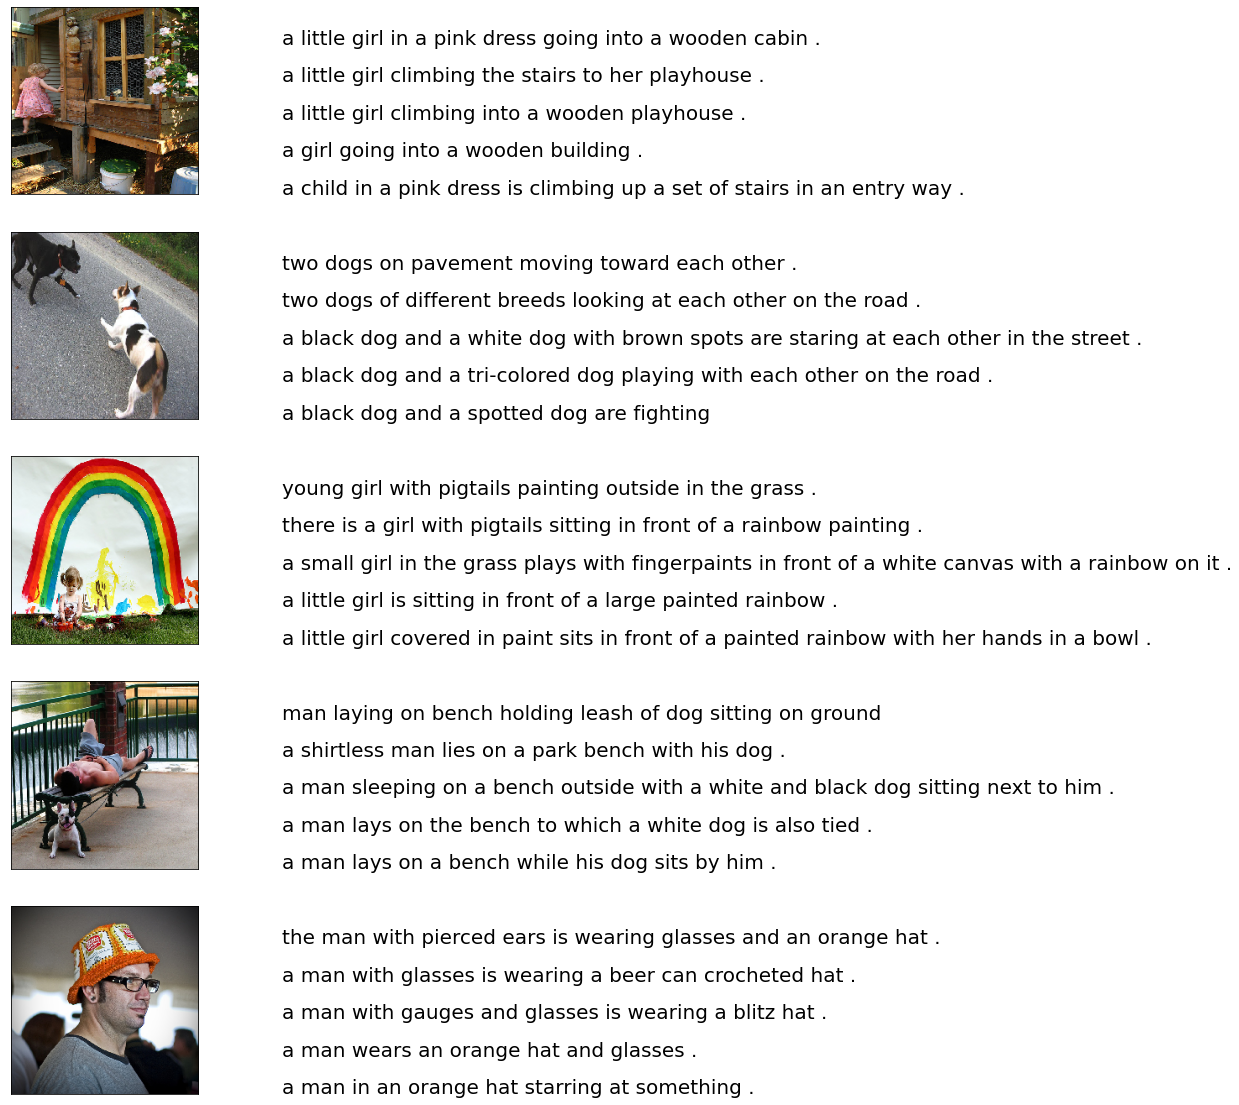

In [6]:

npic = 5
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,20))
for jpgfnm in uni_filenames[:npic]:
    filename = dir_Flickr_jpg + '/' + jpgfnm
    captions = list(df_txt["caption"].loc[df_txt["filename"]==jpgfnm].values)
    image_load = load_img(filename, target_size=target_size)
    
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1
    
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=20)
    count += 1
plt.show()

In [7]:
def df_word(df_txt):
    vocabulary = []
    for txt in df_txt.caption.values:
        vocabulary.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame({"word":ct.keys(),"count":ct.values()})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df_txt)
dfword.head(3)

Vocabulary Size: 8918


,word,count
0,a,62989
1,.,36581
2,in,18975


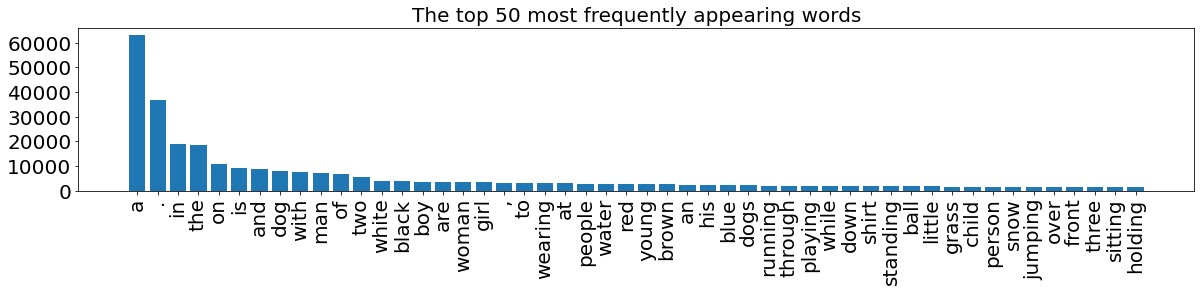

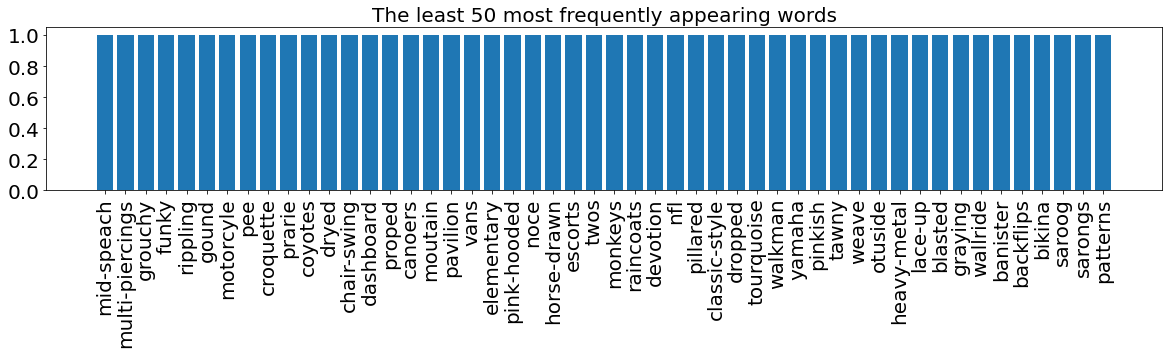

In [8]:
topn = 50

def plthist(dfsub, title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")

In [9]:
import string


def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(string.punctuation)
    return(text_no_punctuation)

def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)

def remove_numeric(text,printTF=False):
    text_no_numeric = ""
    for word in text.split():
        isalpha = word.isalpha()
       
        if isalpha:
            text_no_numeric += " " + word
    return(text_no_numeric)

In [10]:
def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_single_character(text)
    text = remove_numeric(text)
    return(text)


for i, caption in enumerate(df_txt.caption.values):
    newcaption = text_clean(caption)
    df_txt["caption"].iloc[i] = newcaption

Vocabulary Size: 8357


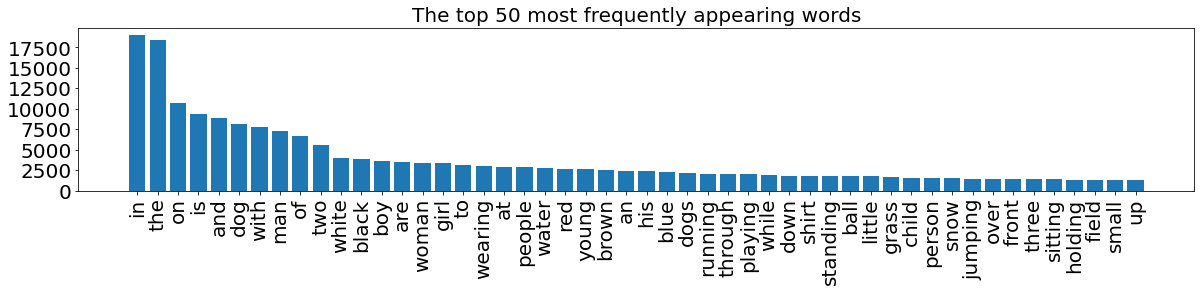

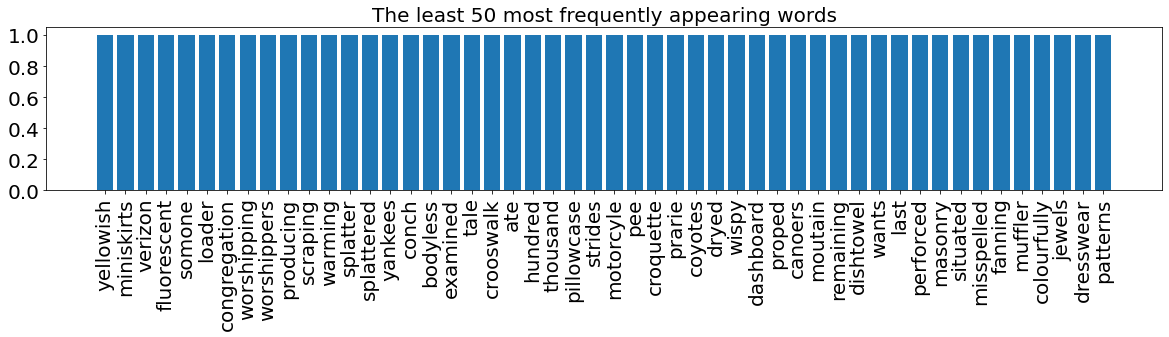

In [11]:
dfword = df_word(df_txt)
plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")

In [12]:
from copy import copy
def add_start_end_seq_token(captions):
    caps = []
    for txt in captions:
        txt = 'startseq ' + txt + ' endseq'
        caps.append(txt)
    return(caps)
df_txt0 = copy(df_txt)
df_txt0["caption"] = add_start_end_seq_token(df_txt["caption"])
df_txt0.head(5)
del df_txt

In [13]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import sys, time, os, warnings 
import numpy as np
import pandas as pd 
from collections import Counter 


In [14]:
model = VGG16()
model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:

from collections import OrderedDict

In [22]:

images = OrderedDict()
npix = 224
target_size = (npix,npix,3)
data = np.zeros((len(jpgs),npix,npix,3))
for i,name in enumerate(jpgs):
    # load an image from file
    filename = dir_Flickr_jpg + '/' + name
    image = load_img(filename, target_size=target_size)
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    nimage = preprocess_input(image)
    
    y_pred = model.predict(nimage.reshape( (1,) + nimage.shape[:3]))
    images[name] = y_pred.flatten()

In [23]:
dump(images, open('images.pkl', 'wb'))

In [16]:
from pickle import load

In [17]:
images = load(open('/content/images.pkl', 'rb'))

In [18]:
dimages, keepindex = [],[]
df_txt0 = df_txt0.loc[df_txt0["index"].values == "0",: ]
for i, fnm in enumerate(df_txt0.filename):
    if fnm in images.keys():
        dimages.append(images[fnm])
        keepindex.append(i)
        
fnames = df_txt0["filename"].iloc[keepindex].values
dcaptions = df_txt0["caption"].iloc[keepindex].values
dimages = np.array(dimages)

**Tokenizer**
 Change character vector to integer vector using Tokenizer

In [19]:
from keras.preprocessing.text import Tokenizer
## the maximum number of words in dictionary
nb_words = 8000
tokenizer = Tokenizer(nb_words=nb_words)
tokenizer.fit_on_texts(dcaptions)
vocab_size = len(tokenizer.word_index) + 1
print("vocabulary size : {}".format(vocab_size))
dtexts = tokenizer.texts_to_sequences(dcaptions)
print(dtexts[:5])

vocabulary size : 4359
[[1, 38, 3, 66, 144, 7, 124, 52, 405, 9, 365, 3, 24, 2323, 521, 2], [1, 12, 8, 5, 751, 8, 17, 366, 2], [1, 48, 15, 170, 3, 583, 101, 3, 41, 9, 550, 1191, 11, 55, 213, 3, 1071, 2], [1, 10, 620, 6, 150, 27, 23, 8, 101, 46, 112, 2], [1, 10, 3, 24, 82, 96, 1192, 19, 162, 2]]


In [26]:
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [27]:
dump(dtexts, open('dtexts.pkl', 'wb'))

**Split between training and testing data**

In [64]:
prop_test, prop_val = 0.1, 0.2

N = len(dtexts)
Ntest, Nval = int(N*prop_test), int(N*prop_val)

def split_test_val_train(dtexts,Ntest,Nval):
    return(dtexts[:Ntest], 
           dtexts[Ntest:Ntest+Nval],  
           dtexts[Ntest+Nval:])

dt_test,  dt_val, dt_train   = split_test_val_train(dtexts,Ntest,Nval)
di_test,  di_val, di_train   = split_test_val_train(dimages,Ntest,Nval)
fnm_test,fnm_val, fnm_train  = split_test_val_train(fnames,Ntest,Nval)

In [65]:
#The maximume length of captions

maxlen = np.max([len(text) for text in dtexts])


In [66]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical


In [67]:

def preprocessing(dtexts,dimages):
    N = len(dtexts)
    print("# captions/images = {}".format(N))

    assert(N==len(dimages))
    Xtext, Ximage, ytext = [],[],[]
    for text,image in zip(dtexts,dimages):

        for i in range(1,len(text)):
            in_text, out_text = text[:i], text[i]
            in_text = pad_sequences([in_text],maxlen=maxlen).flatten()
            out_text = to_categorical(out_text,num_classes = vocab_size)

            Xtext.append(in_text)
            Ximage.append(image)
            ytext.append(out_text)

    Xtext  = np.array(Xtext)
    Ximage = np.array(Ximage)
    ytext  = np.array(ytext)
    print(" {} {} {}".format(Xtext.shape,Ximage.shape,ytext.shape))
    return(Xtext,Ximage,ytext)


Xtext_train, Ximage_train, ytext_train = preprocessing(dt_train,di_train)
Xtext_val,   Ximage_val,   ytext_val   = preprocessing(dt_val,di_val)
# pre-processing is not necessary for testing data
#Xtext_test,  Ximage_test,  ytext_test  = preprocessing(dt_test,di_test)

# captions/images = 5664
 (57702, 30) (57702, 4096) (57702, 4359)
# captions/images = 1618
 (16468, 30) (16468, 4096) (16468, 4359)


In [24]:
from keras.layers import Dropout

MODEL

In [68]:
from keras import layers
print(vocab_size)
## image feature

dim_embedding = 64

input_image = layers.Input(shape=(Ximage_train.shape[1],))
input_image = Dropout(0.5)(input_image)
fimage = layers.Dense(256,activation='relu',name="ImageFeature")(input_image)
## sequence model
input_txt = layers.Input(shape=(maxlen,))
ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
ftxt = Dropout(0.5)(ftxt)
ftxt = layers.LSTM(256,name="CaptionFeature")(ftxt)
## combined model for decoder

decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(256,activation='relu')(decoder)
output = layers.Dense(vocab_size,activation='softmax')(decoder)
model = Model(inputs=[input_image, input_txt],outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam')

print(model.summary())

4359
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 30, 64)       278976      ['input_9[0][0]']                
                                                                                                  
 dropout_5 (Dropout)            (None, 30, 64)       0           ['embedding_2[1][0]']            
                                                                                                  
 input_10 (InputLayer)          [(None, 4096)]       0           []                               
                                                                                       

In [69]:
# fit model
start = time.time()
hist = model.fit([Ximage_train, Xtext_train], ytext_train, 
                  epochs=10, verbose=2, 
                  batch_size=64,
                  validation_data=([Ximage_val, Xtext_val], ytext_val))
end = time.time()
print("TIME TOOK {:3.2f}MIN".format((end - start )/60))

Epoch 1/10
902/902 - 180s - loss: 5.3328 - val_loss: 4.7902 - 180s/epoch - 200ms/step
Epoch 2/10
902/902 - 172s - loss: 4.4224 - val_loss: 4.4881 - 172s/epoch - 191ms/step
Epoch 3/10
902/902 - 172s - loss: 3.9802 - val_loss: 4.3837 - 172s/epoch - 190ms/step
Epoch 4/10
902/902 - 172s - loss: 3.6834 - val_loss: 4.3658 - 172s/epoch - 191ms/step
Epoch 5/10
902/902 - 171s - loss: 3.4498 - val_loss: 4.4380 - 171s/epoch - 190ms/step
Epoch 6/10
902/902 - 172s - loss: 3.2381 - val_loss: 4.5621 - 172s/epoch - 191ms/step
Epoch 7/10
902/902 - 173s - loss: 3.0411 - val_loss: 4.7400 - 173s/epoch - 191ms/step
Epoch 8/10
902/902 - 171s - loss: 2.8633 - val_loss: 5.0056 - 171s/epoch - 190ms/step
Epoch 9/10
902/902 - 171s - loss: 2.6968 - val_loss: 5.2294 - 171s/epoch - 190ms/step
Epoch 10/10
902/902 - 172s - loss: 2.5432 - val_loss: 5.4103 - 172s/epoch - 191ms/step
TIME TOOK 28.78MIN


In [70]:
print(Ximage_train.shape,Xtext_train.shape,ytext_train.shape)

(57702, 4096) (57702, 30) (57702, 4359)


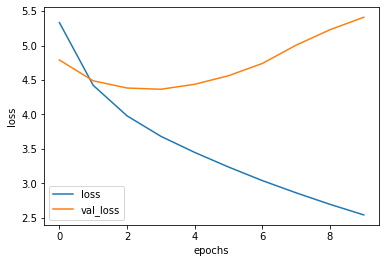

In [71]:
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

**Prediction**
Prediction of testing image makes sense!

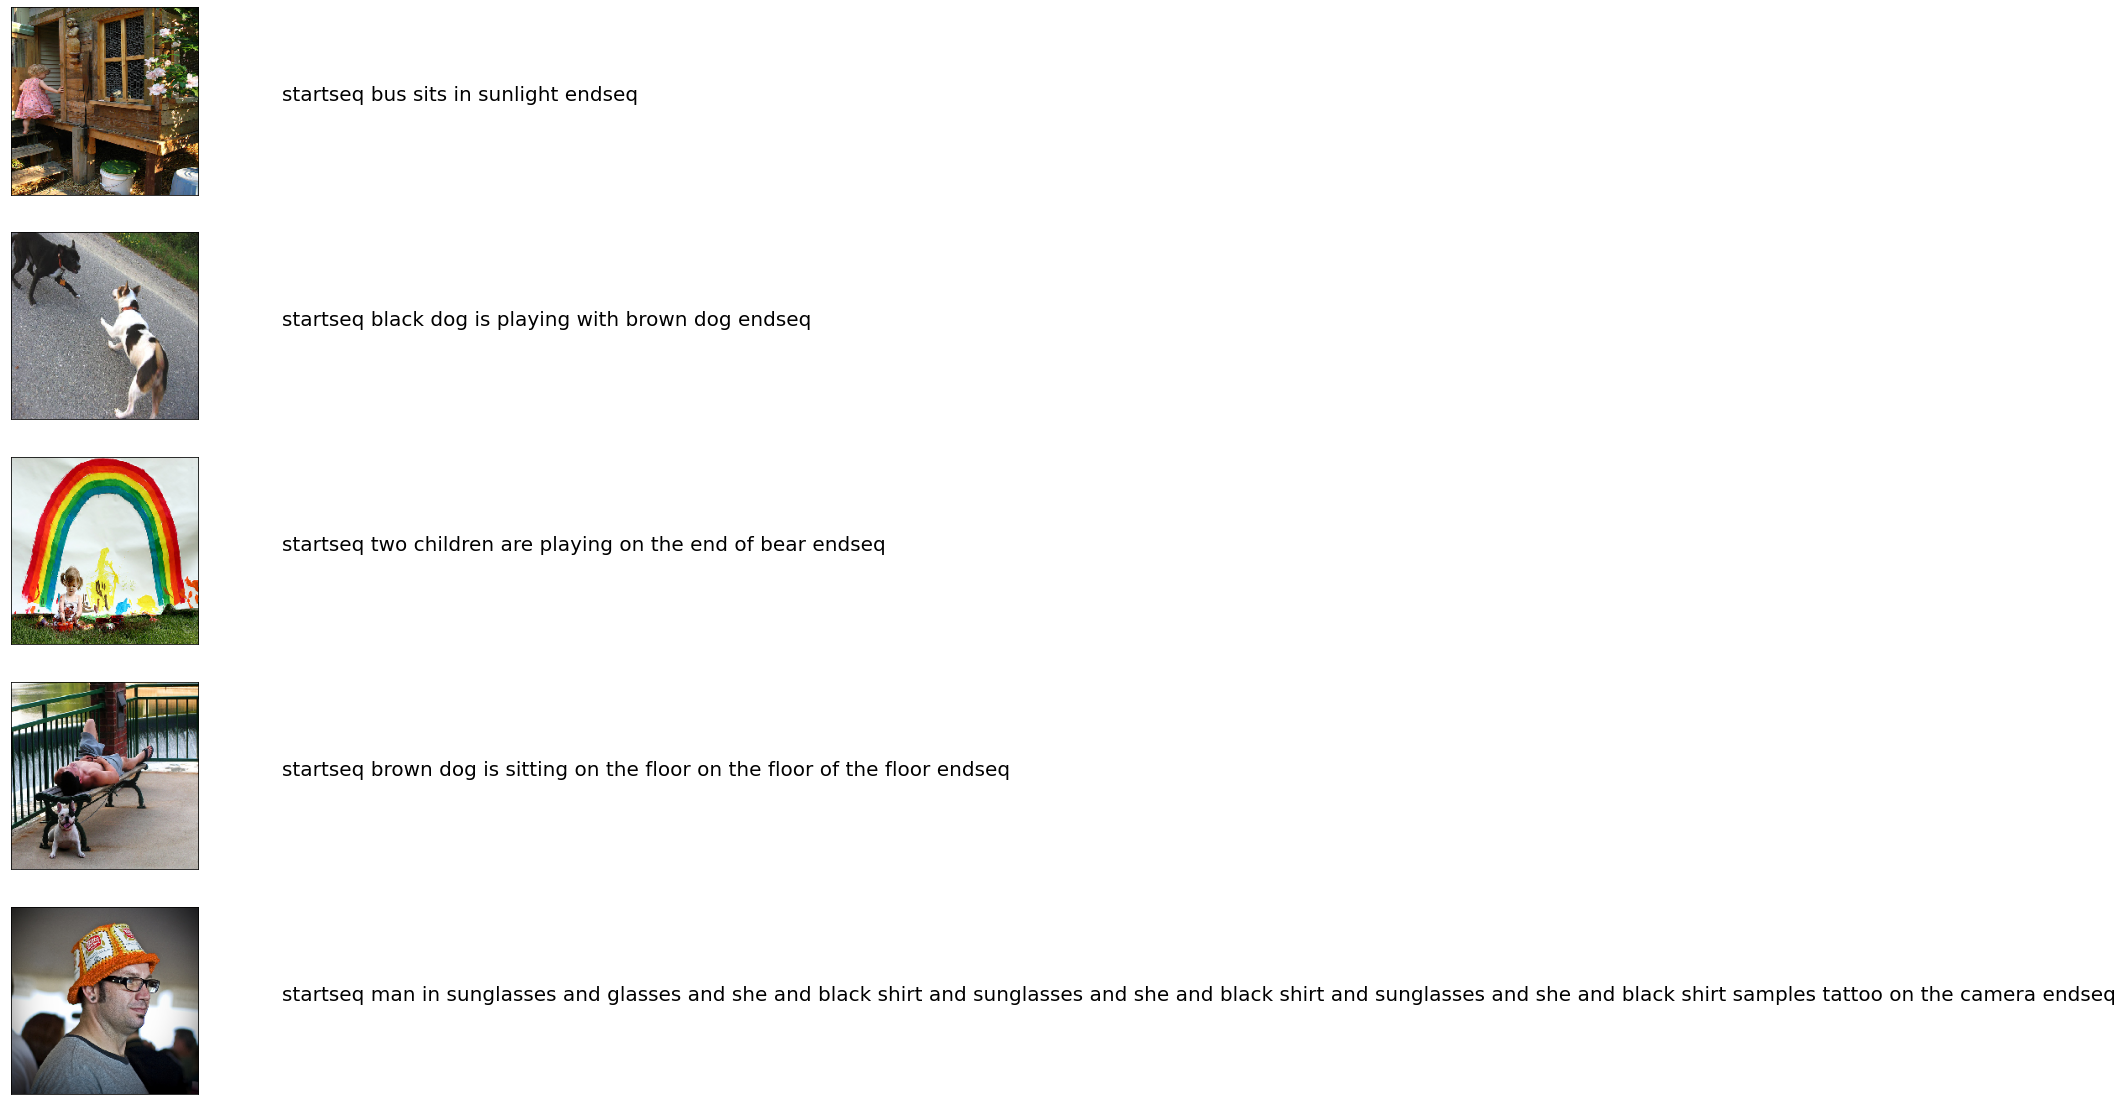

In [72]:
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])
def predict_caption(image):
    '''
    image.shape = (1,4462)
    '''

    in_text = 'startseq'

    for iword in range(maxlen):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence],maxlen)
        yhat = model.predict([image,sequence],verbose=0)
        yhat = np.argmax(yhat)
        newword = index_word[yhat]
        in_text += " " + newword
        if newword == "endseq":
            break
    return(in_text)



npic = 5
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,20))
for jpgfnm, image_feature in zip(fnm_test[:npic],di_test[:npic]):
    ## images 
    filename = dir_Flickr_jpg + '/' + jpgfnm
    image_load = load_img(filename, target_size=target_size)
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1

    ## captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0,0.5,caption,fontsize=20)
    count += 1

plt.show()

In [73]:
hypothesis = "I like dog"
hypothesis = hypothesis.split()
reference  = "I do like dog"
references = [reference.split()] 

In [74]:
from nltk.translate.bleu_score import sentence_bleu
print("BLEU={:4.3f}".format(sentence_bleu(references,hypothesis)))    

BLEU=0.000


In [75]:
hypothesis2 = "I love dog!".split()
print("BLEU={:4.3f}".format(sentence_bleu(references,  hypothesis2))) 

BLEU=0.000


In [76]:
from nltk.util import ngrams
n = 2
# Extracts all ngrams in hypothesis
# Set an empty Counter if hypothesis is empty.
counts = Counter(ngrams(hypothesis, n)) if len(hypothesis) >= n else Counter()
# Extract a union of references' counts.
counts

Counter({('I', 'like'): 1, ('like', 'dog'): 1})

In [77]:
max_counts = {}
for reference in references:
    reference_counts = Counter(ngrams(reference, n)) if len(reference) >= n else Counter()
    for ngram in counts: ## ngram from hypothesis
        max_counts[ngram] = max(max_counts.get(ngram, 0),
                                reference_counts[ngram])

max_counts

{('I', 'like'): 0, ('like', 'dog'): 1}

In [78]:
# Assigns the intersection between hypothesis and references' counts.
clipped_counts = {ngram: min(count, max_counts[ngram])
                      for ngram, count in counts.items()}

numerator = sum(clipped_counts.values())
# Ensures that denominator is minimum 1 to avoid ZeroDivisionError.
# Usually this happens when the ngram order is > len(reference).
denominator = max(1, sum(counts.values()))

modified_precision = numerator/float(denominator)
print(modified_precision)

0.5


In [79]:
ref_len = len(reference)
hyp_len = float(len(hypothesis))
brevity_penalty = np.exp(1 - ref_len / hyp_len)
print("reference length = {:1.0f}, hypothesis length = {:1.0f}, penalty = {:4.3f}".format(
    ref_len,hyp_len,brevity_penalty))

reference length = 4, hypothesis length = 3, penalty = 0.717


In [80]:
brevity_penalty*modified_precision

0.35826565528689464

In [81]:
print("2-gram result:{}".format(sentence_bleu(references,hypothesis, weights=[0,1,0,0])))


2-gram result:0.35826565528689464


In [82]:
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])


nkeep = 5
pred_good, pred_bad, bleus = [], [], [] 
count = 0 
for jpgfnm, image_feature, tokenized_text in zip(fnm_test,di_test,dt_test):
    count += 1
    if count % 200 == 0:
        print("  {:4.2f}% is done..".format(100*count/float(len(fnm_test))))
    
    caption_true = [ index_word[i] for i in tokenized_text ]     
    caption_true = caption_true[1:-1] ## remove startreg, and endreg
    ## captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    caption = caption.split()
    caption = caption[1:-1]## remove startreg, and endreg
    
    bleu = sentence_bleu([caption_true],caption)
    bleus.append(bleu)
    if bleu > 0.7 and len(pred_good) < nkeep:
        pred_good.append((bleu,jpgfnm,caption_true,caption))
    elif bleu < 0.3 and len(pred_bad) < nkeep:
        pred_bad.append((bleu,jpgfnm,caption_true,caption))

  24.72% is done..
  49.44% is done..
  74.17% is done..
  98.89% is done..


In [83]:
print("Mean BLEU {:4.3f}".format(np.mean(bleus)))

Mean BLEU 0.010


Bad Caption


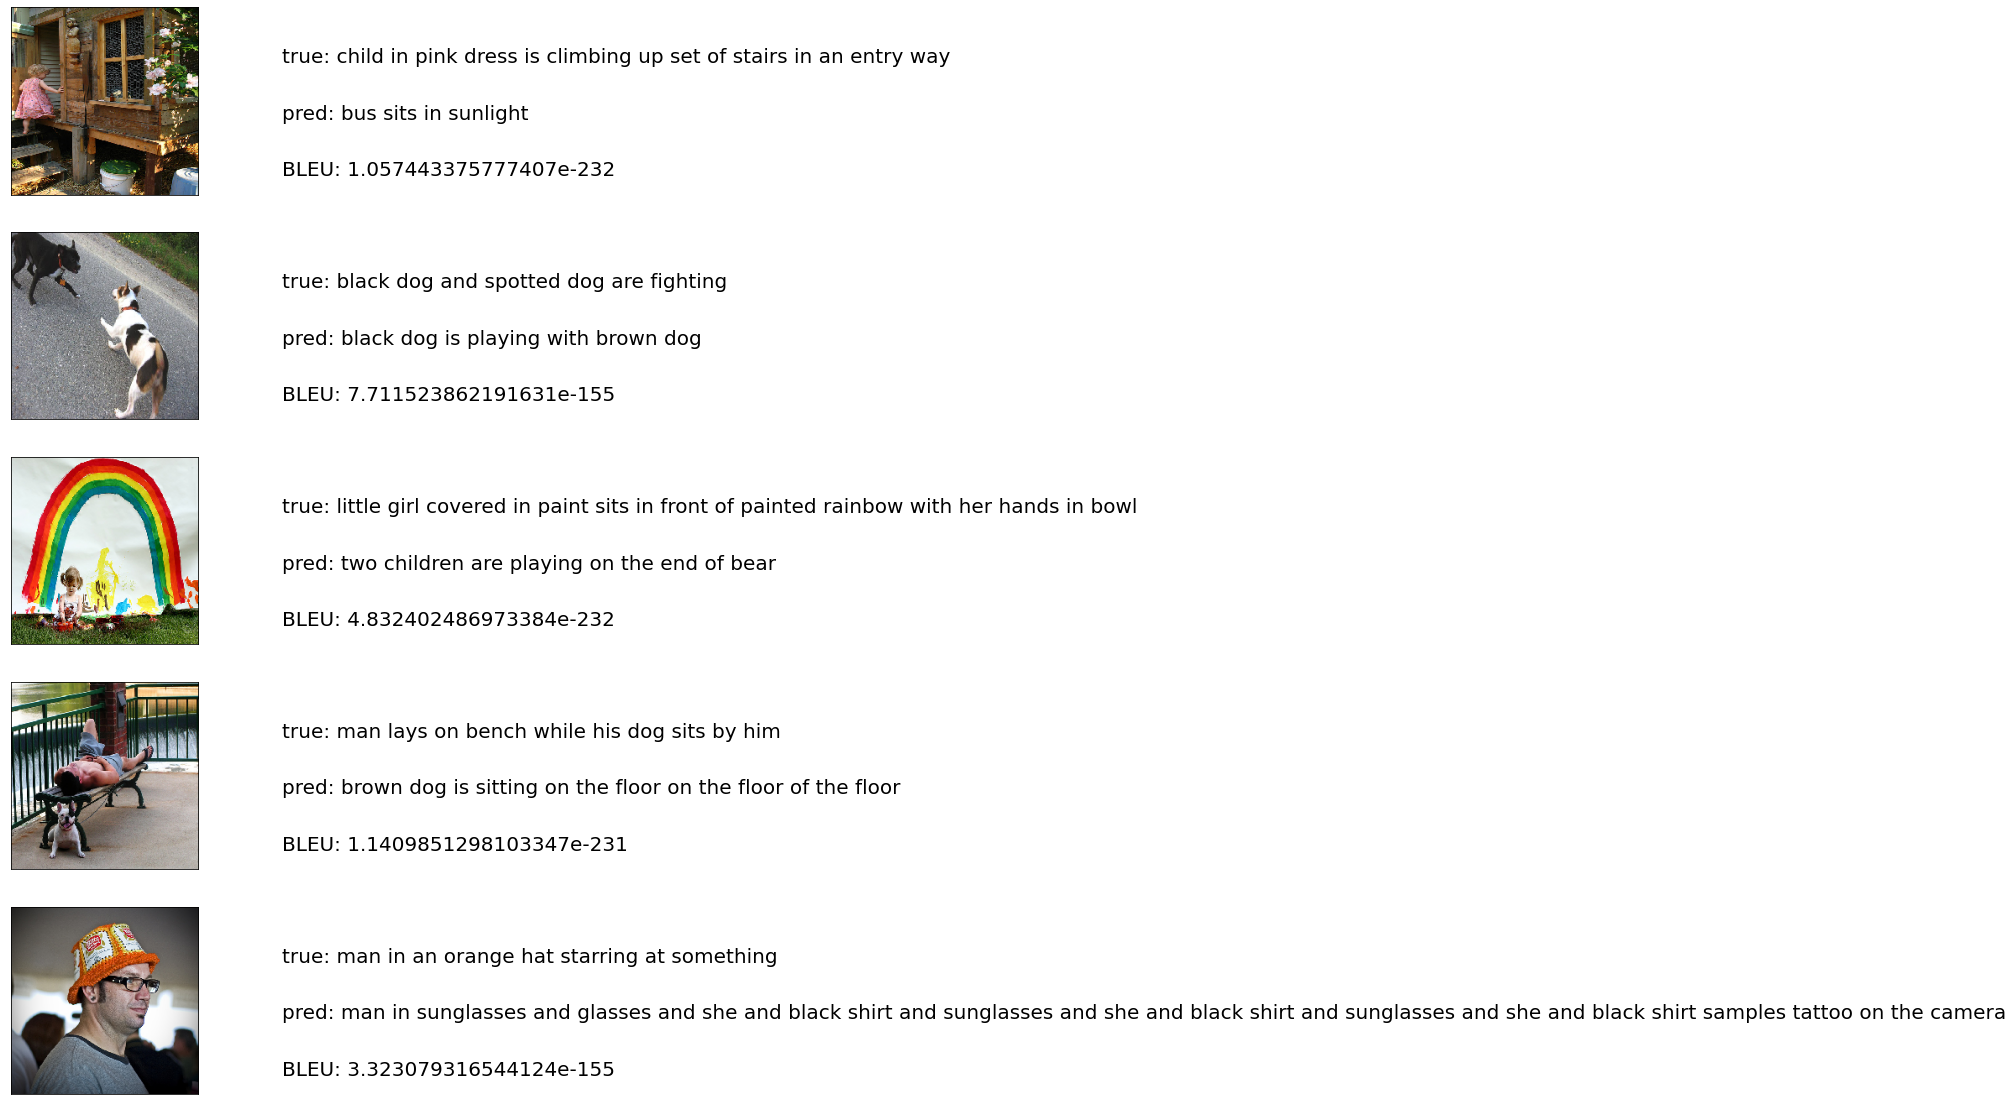

In [84]:
def plot_images(pred_bad):
    def create_str(caption_true):
        strue = ""
        for s in caption_true:
            strue += " " + s
        return(strue)
    npix = 224
    target_size = (npix,npix,3)    
    count = 1
    fig = plt.figure(figsize=(10,20))
    npic = len(pred_bad)
    for pb in pred_bad:
        bleu,jpgfnm,caption_true,caption = pb
        ## images 
        filename = dir_Flickr_jpg + '/' + jpgfnm
        image_load = load_img(filename, target_size=target_size)
        ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        caption_true = create_str(caption_true)
        caption = create_str(caption)
        
        ax = fig.add_subplot(npic,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.text(0,0.7,"true:" + caption_true,fontsize=20)
        ax.text(0,0.4,"pred:" + caption,fontsize=20)
        ax.text(0,0.1,"BLEU: {}".format(bleu),fontsize=20)
        count += 1
    plt.show()

print("Bad Caption")
plot_images(pred_bad)


Good Caption


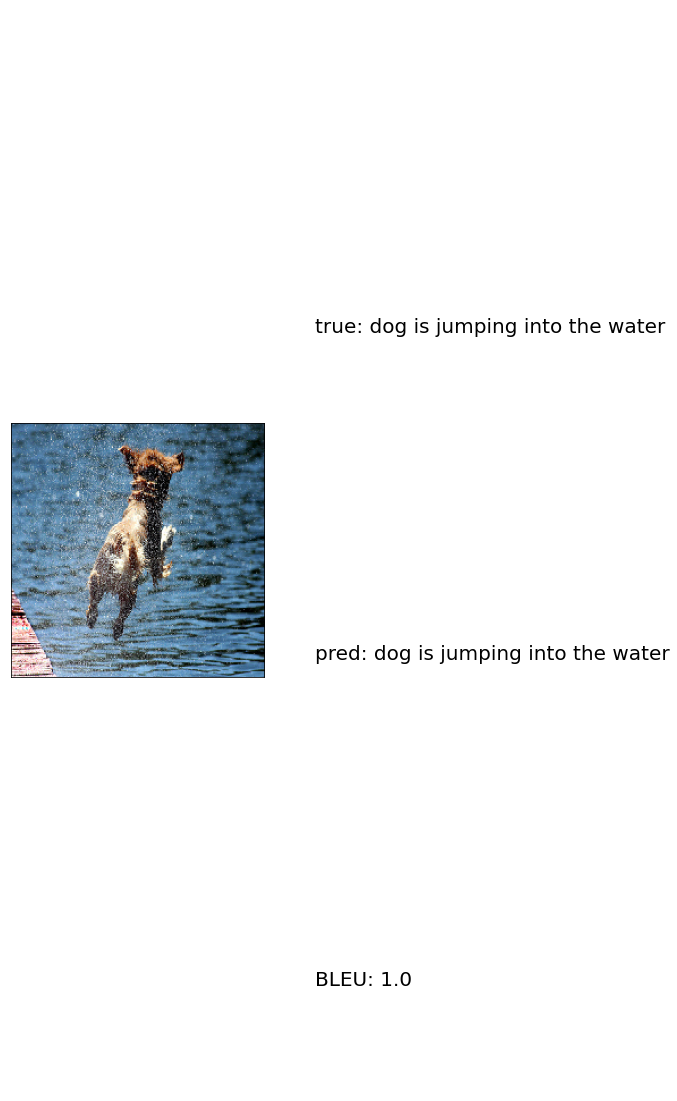

In [85]:
print("Good Caption")
plot_images(pred_good)